# Análise dos casos de Sindrome Respiratória Aguda Grave(SRAG)

O intuito desta análise é realizar uma comparação dos dados de diagnóticos de SRAG de 2018 e 2019 do Ministério da Saúde, com os dados de 2020. Com a pandemia causada pelo vírus Sars-CoV-2, muitos casos de covid-19 estão sendo diagnosticados como Sindrome Respiratória Aguda Grave devido a falta de testes disponibilizadas pelo Governo, o que prejudica a percepção de como o vírus está se dissiminando no país, para que as devidas medidas sejam tomadas.

In [216]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

### Tabelas que contém os dados dos respectivos anos

In [217]:
# defining paths
data2018, data2019, data2020 = './data-2018.csv', './data-2019.csv', './data-2020.csv'

### Filtrando as tabelas de 2018 e 2019 para pegar apenas os dados do 1º Semestre

In [219]:
# Reading sheets and filtering by date(01/january - 30/june)
df2018 = pd.read_csv('data-2018.csv', sep=';',engine='python').loc['01/01/2018':'30/06/2018']
df2019 = pd.read_csv('data-2019.csv', sep=';',engine='python').loc['01/01/2019':'30/06/2019']
df2020 = pd.read_csv('data-2020.csv', sep=';',engine='c', encoding='ISO-8859-1')

## Tipo dos resultados

###  Classificação Final (CLASSI_FIN):
* 1 - SRAG por influenza
* 2 - SRAG por outro vírus respiratório
* 3 - SRAG por outro agente Etiológico
* 4 - SRAG não especificado
* 5 - COVID-19

### Evolução (EVOLUCAO):
* 1 - Cura
* 2 - Óbito
* 9 - Ignorado

### Suporte Ventilatório (SUPORT_VEN):
* 1 - Sim, invasivo
* 2 - Sim, não invasivo
* 3 - Não
* 9 - Ignorado

### Outros
* 1 - Sim
* 2 - Não 
* 9 - Ignorado 

## Filtrando a tabela pelas colunas relevantes

In [220]:
df2018.filter(['DT_NOTIFIC', 'DT_INTERNA', 'UTI', 'SUPORT_VEN', 'VACINA', 'EVOLUCAO', 'CLASSI_FIN'])

,DT_NOTIFIC,DT_INTERNA,UTI,SUPORT_VEN,VACINA,EVOLUCAO,CLASSI_FIN
1,19/04/2018,18/04/2018,2.0,1.0,1.0,1.0,4.0
2,27/04/2018,26/04/2018,NaN,1.0,2.0,1.0,4.0
3,12/04/2018,11/04/2018,2.0,3.0,1.0,1.0,4.0
4,19/04/2018,18/04/2018,2.0,1.0,2.0,1.0,4.0
5,24/05/2018,04/04/2018,2.0,1.0,NaN,1.0,4.0
...,...,...,...,...,...,...,...
29995,26/08/2018,26/08/2018,2.0,3.0,1.0,1.0,4.0
29996,29/08/2018,29/08/2018,1.0,1.0,2.0,1.0,4.0
29997,31/08/2018,29/08/2018,1.0,2.0,1.0,1.0,4.0
29998,31/08/2018,30/08/2018,1.0,2.0,9.0,2.0,4.0


In [221]:
df2019.filter(['DT_NOTIFIC', 'DT_INTERNA', 'UTI', 'SUPORT_VEN', 'POS_IF_FLU', 'PCR_SARS2', 'HISTO_VGM', 'VACINA' , 'EVOLUCAO', 'DT_EVOLUCA', 'CLASSI_FIN'])

,DT_NOTIFIC,DT_INTERNA,UTI,SUPORT_VEN,POS_IF_FLU,PCR_SARS2,HISTO_VGM,VACINA,EVOLUCAO,DT_EVOLUCA,CLASSI_FIN
1,03/01/2019,01/01/2019,1.0,2.0,NaN,NaN,0,2.0,1.0,05/03/2019,4.0
2,02/01/2019,02/01/2019,2.0,2.0,NaN,NaN,0,2.0,1.0,12/02/2019,4.0
3,10/01/2019,10/01/2019,1.0,2.0,2.0,NaN,0,2.0,1.0,29/01/2019,2.0
4,11/01/2019,13/01/2019,9.0,9.0,NaN,NaN,0,2.0,2.0,13/01/2019,4.0
5,02/01/2019,01/01/2019,2.0,2.0,NaN,NaN,0,9.0,1.0,08/01/2019,4.0
...,...,...,...,...,...,...,...,...,...,...,...
29995,28/06/2019,27/06/2019,2.0,3.0,NaN,NaN,0,9.0,1.0,30/06/2019,4.0
29996,09/07/2019,08/07/2019,2.0,3.0,NaN,NaN,0,NaN,1.0,09/07/2019,4.0
29997,17/06/2019,17/06/2019,1.0,1.0,NaN,NaN,0,NaN,2.0,21/06/2019,4.0
29998,12/07/2019,11/07/2019,1.0,2.0,NaN,NaN,0,NaN,1.0,09/08/2019,1.0


In [222]:
df2020.filter(['DT_NOTIFIC', 'DT_INTERNA', 'UTI', 'SUPORT_VEN', 'POS_IF_FLU', 'PCR_SARS2', 'HISTO_VGM', 'VACINA', 'EVOLUCAO', 'DT_EVOLUCA', 'CLASSI_FIN'])

,DT_NOTIFIC,DT_INTERNA,UTI,SUPORT_VEN,POS_IF_FLU,PCR_SARS2,HISTO_VGM,VACINA,EVOLUCAO,DT_EVOLUCA,CLASSI_FIN
0,30/12/2019,30/12/2019,2.0,NaN,NaN,NaN,0,1.0,1.0,04/01/2020,4.0
1,31/12/2019,30/12/2019,1.0,1.0,NaN,NaN,0,2.0,1.0,05/04/2020,4.0
2,02/01/2020,01/01/2020,2.0,2.0,NaN,NaN,0,2.0,1.0,06/01/2020,1.0
3,31/12/2019,31/12/2019,2.0,3.0,NaN,NaN,0,2.0,1.0,02/01/2020,2.0
4,02/01/2020,02/01/2020,2.0,2.0,NaN,NaN,0,NaN,1.0,05/01/2020,2.0
...,...,...,...,...,...,...,...,...,...,...,...
356183,25/06/2020,25/06/2020,NaN,3.0,NaN,NaN,0,2.0,NaN,NaN,NaN
356184,25/06/2020,24/06/2020,2.0,1.0,NaN,NaN,2,2.0,NaN,NaN,NaN
356185,29/06/2020,26/06/2020,1.0,2.0,NaN,NaN,2,9.0,NaN,NaN,NaN
356186,26/06/2020,26/06/2020,2.0,3.0,NaN,NaN,2,NaN,NaN,NaN,NaN


## Comparação entre os dados de SRAG dos anos de 2018/2019 e 2020
Através do gráfico gerado pode-se notar que os casos de SRAG não especificado do primeiro semestre de 2018 e 2019 não ultrapassam os 20.000, já em 2020 os casos de SRAG ultrapassam os 100.000,chegando perto do número de casos que obtiveram resultado potivo para Covid.
Com isso, podemos concluir que, ou há um surto de Sindrome Respiratória Aguda Grave de um vírus desconhecido, ou milhares de casos de covid-19 estão sendo diagnosticados como SRAG devido a falta de testes fornecidas pelo Governo. Isso implica na falta de compreensão da realidade de como o vírus está se espalhando pelo nosso país, assim como dificulta em pesquisas nacionais de uma vacina e formas de tratamento contra o vírus. 


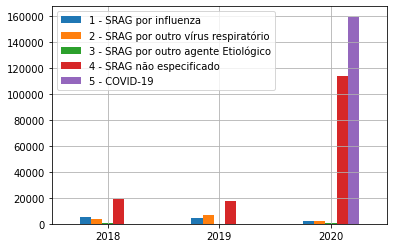

In [223]:
classif_2018 = df2018['CLASSI_FIN'].value_counts()
classif_2019 = df2019['CLASSI_FIN'].value_counts()
classif_2020 = df2020['CLASSI_FIN'].value_counts()

# 4 DIAGNOSTICOS - 2018
case1_2018 = classif_2018[1.0]
case2_2018 = classif_2018[2.0]
case3_2018 = classif_2018[3.0]
case4_2018 = classif_2018[4.0]
case5_2018 = 0
# 4 DIAGNOSTICOS - 2019
case1_2019 = classif_2019[1.0]
case2_2019 = classif_2019[2.0]
case3_2019 = classif_2019[3.0]
case4_2019 = classif_2019[4.0]
case5_2019 = 0

# 4 DIAGNOSTICOS - 2020
case1_2020 = classif_2020[1.0]
case2_2020 = classif_2020[2.0]
case3_2020 = classif_2020[3.0]
case4_2020 = classif_2020[4.0]
case5_2020 = classif_2020[5.0]

index = ['2018', '2019', '2020']

df = pd.DataFrame({'1 - SRAG por influenza': [case1_2018, case1_2019, case1_2020],
                   '2 - SRAG por outro vírus respiratório': [case2_2018, case2_2019, case2_2020], 
                  '3 - SRAG por outro agente Etiológico': [case3_2018, case3_2019, case3_2020],
                 '4 - SRAG não especificado': [case4_2018, case4_2019, case4_2020],
                  '5 - COVID-19': [case5_2018, case5_2019,case5_2020]
                  }, index=index)

ax = df.plot.bar(rot=0,grid=True)